# MATH 375 Assignment 5

**Brenton LeMesurier**

**Revisions on April 21:**
- Added test case $du/dt = u^2$, $u(0) = 1$ on $[0, 1]$.
- Correction: Missing factors of $h$ inserted to $K_2$ and $K_3$.

**Previously updated on April 15:** Some extra tips.

**Next versions due by Friday April 23**

Exercises  2, 4 and 7 from the Exercises on IVPs for ODEs.
That is:

## Exercise (I)

A) Verify that for the simple case where $f(t, u) = f(t)$,
the explicit trapezoid method gives the same result as the composite trapezoid rule for integration.

B) Do one step of this method for the canonical example $du/dt = ku$, $u(t_0) = u_0$.
It will have the form $U_1 = G U_0$ where the growth factor $G$ approximates the factor $g=e^{kh}$ for the exact solution $u(t_1) = g u(t_0)$ of the ODE.

C) Compare to $G=1+kh$ seen for Euler's method.

D) Use the previous result to express $U_i$ in terms of $U_0=u_0$, as done for Euler's method.

## Exercise (II)

A) Apply Richardson extrapolation to one step of Euler's method, using the values given by step sizes $h$ and $h/2$.

B) This should give a second order accurate method, so compare it to the above two methods.

## Exercise (III) [Python]

Implement the
[error control version of the explicit trapezoid method](https://lemesurierb.github.io/elementary-numerical-analysis-python/notebooks/ODE-IVP-5-error-control-python.html#ETMEC)
from section on
[Error Control and Variable Step Sizes](https://lemesurierb.github.io/elementary-numerical-analysis-python/notebooks/ODE-IVP-5-error-control-python.html)

and test on the two familiar examples

$$
\begin{split}
du/dt &= Ku
\\
&\text{and}
\\
du/dt &= K(\cos(t) - u) - \sin(t)
\end{split}
$$

($K=1$ is enough.)

**Added April 21:**
As a final more challenging test, solve $du/dt = u^2$, $u(0) = 1$ on interval $[0, 1]$
(As seen in Example 3 of the first section on ODE's, there is a problem at $t=1$!).

**Added April 15**

Here is the key elements of the algorithm; one important note is that the time steps are done according to the explicit trapezoid rule, even though another, higher order accurate, approximate increment of $U$ is computed; the latter is used solely to compute the error estimate.

The basic formulas for each time step are:

$K_1 = h f(t, U)$

$K_2 = h f(t + h, U + K_1)$

(So far, as for the explicit trapezoid method)

$K_3 = h f(t + h/2, U + (K_1 + K_2)/2)$

(a midpoint approximation, using the above)

$\delta_2 = (K_1 + K_2)/2$

(The order 2 increment as for the explicit trapezoid method)

I omit the third order increment $\delta_3$, as that is only used to get the following error estimate

$e_h = |\delta_2 - \delta_3 |, \, = |K_1 -2 K_3 + K_2|/3$

If this step is accepted, one uses the explicit trapezoid rule step: $U_{i+1} = U_i + \delta_2$.

The other ingredient is the time step adjustment.
A simple first version for this is:
- If the error is too large, reject that attempted time step, half h, and try again.
- Never increase the time step size!

This could be inefficient, but will do as well as the more refined step0size adjustment algorithm for accuracy,
and it is usually best to address accuracy first efficiency later.

For the more refined step-size adjustment, the scale factor for a second order accurate method like this is

$$s = 0.9 \left( \frac{3 T}{|K_1 -2 K_3 + K_2|} \right)^{1/3}$$

and the step-size adjustment procedure is as shown in the section on *Error Control and Variable Step Sizes* for the case of the Euler method:

if $s>1$: $\qquad$ (I.e.  $e_h/h < T$ and so good enough)

$\quad$Update $U$ and $t$ with the new time values and then increase $h$ for the *next* time step:

$\quad h \leftarrow \min(s h, h_{max})$

else: $\qquad$ ($s \leq 1$, so not good enough: reduce $h$ and try again)

$\quad h \leftarrow \max(s h, h_{min})$

$\quad$Start again from $K_1 = \dots$

**Python coding notes**

The number of time steps is not known in advance, so:

1. a `while` loop is probably more appropriate (contrary to my usual preference for `for` loops!), and

2. Python lists are probably most convenient (contrary to my usual preference for Numpy arrays!),
as they allow incremental expansion by appending new values:
    1. Initialize with `t = [a]` and `U = [u_0]`, and then
    2. Append new values with syntax like `t.append(t_new)` and `U.append(U_new)`
(Aside: the final values could then be converted to arrays at the end, with `U=np.array(U)` and such,
but that may not be necessary; for example, matplotlib can handle lists too, as illustrated below.)

3. It might be a useful approach to first implement the somewhat simpler procedure of error control in Euler's method, as described in the notes: see section 25.4 in
[Error Control and Variable Step Sizes](https://lemesurierb.github.io/elementary-numerical-analysis-python/notebooks/ODE-IVP-5-error-control-python.html)

### An illustration of working with lists instead of arrays

In [1]:
import numpy as np
import matplotlib.pyplot as plt

i=1, U=[2.0, 1.0]
i=2, U=[2.0, 1.0, 0.5]
i=3, U=[2.0, 1.0, 0.5, 0.3333333333333333]
i=4, U=[2.0, 1.0, 0.5, 0.3333333333333333, 0.25]
i=5, U=[2.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2]
i=6, U=[2.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
i=7, U=[2.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285]

List U is [2.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285]
Array U is [2.         1.         0.5        0.33333333 0.25       0.2
 0.16666667 0.14285714]


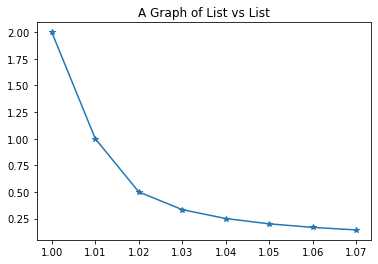

In [2]:
a = 1.0
b = 3.0
u_0 = 2.0
h = 0.01

t = [a]
U = [u_0]
for i in range(1, 8):
    t.append(a+i*h)
    U.append(1.0/i)
    print(f"{i=}, {U=}")
print()
print("List U is", U)
plt.plot(t,U, '-*')
plt.title("A Graph of List vs List")

U = np.array(U)
print("Array U is", U)

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)